# Without Standardized Values

Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')
data

C:\Users\yadu\AppData\Local\Temp\ipykernel_15512\524766443.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Midterm mark,Final mark
0,32.5,31.7
1,53.4,68.8
2,61.5,62.6
3,47.5,71.5
4,59.8,87.2
...,...,...
95,50.0,81.5
96,49.2,72.1
97,50.0,85.2
98,48.1,66.2


Initializing m, b and α

In [2]:
m = -0.5
b = 0
alpha = 0.0001

Plotting Data points from student marks data set:

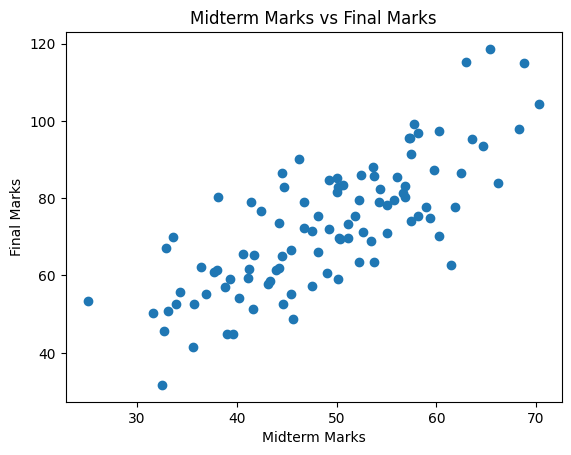

0     32.5
1     53.4
2     61.5
3     47.5
4     59.8
      ... 
95    50.0
96    49.2
97    50.0
98    48.1
99    25.1
Name: Midterm mark, Length: 100, dtype: float64


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv')
midterm_marks = data['Midterm mark']
final_marks = data['Final mark']

def draw_plot():
  plt.scatter(midterm_marks, final_marks)
  plt.xlabel('Midterm Marks')
  plt.ylabel('Final Marks')
  plt.title('Midterm Marks vs Final Marks')
  plt.show()

draw_plot()
print(midterm_marks)

Plotting inital regression line on the same figure (𝒎 = -0.5, 𝒃 = 0)

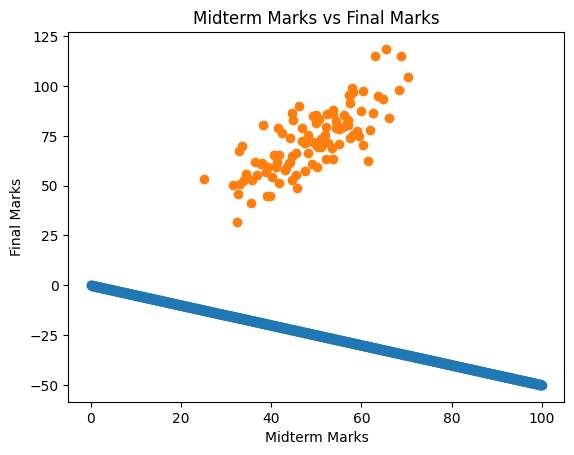

In [4]:
x_values = np.linspace(0, 100, 1000)
plt.scatter(x_values, (-0.5 * x_values + 0))
draw_plot()

Updating b and m values after 100 iterations and then plotting the regression line

-9861.745100000006 -194.42899999999995 0.48617451000000056 0.019442899999999996
-4946.66485276014 -97.82587852981992 0.9808409952760146 0.02922548785298199
-2481.2509292877708 -49.369560448857236 1.2289660882047917 0.03416244389786771
-1244.594454074414 -25.06377368736746 1.3534255336122332 0.03666882126660446
-624.2851327582954 -12.87194095722415 1.4158540468880627 0.03795601536232687
-313.13675663560696 -6.756491406090022 1.4471677225516235 0.03863166450293588
-157.06411896409517 -3.688967614184263 1.462874134448033 0.039000561264354305
-78.77777684531424 -2.1502893805887937 1.4707519121325643 0.039215590202413185
-39.50919363742755 -1.3784830873987375 1.474702831496307 0.03935343851115306
-19.811995075265042 -0.9913412685222872 1.4766840310038336 0.03945257263800529
-9.931841562402116 -0.7971479068905991 1.4776772151600739 0.03953228742869435
-4.975937163462644 -0.6997378710984886 1.4781748088764202 0.0396022612158042
-2.4900458096102387 -0.6508745420070785 1.4784238134573813 0.0396

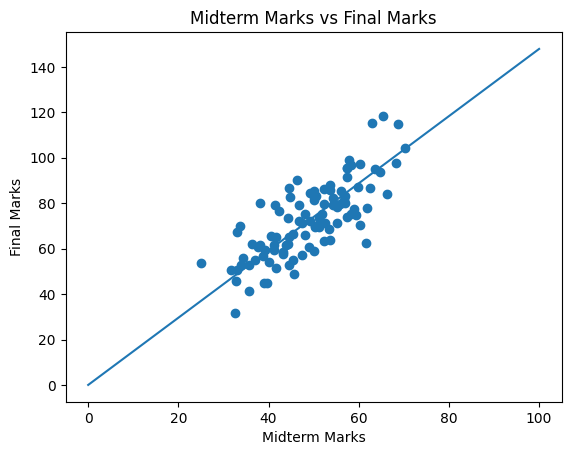

In [5]:
def get_gradient(m, b, N, midterm_marks, final_marks) -> (int):
  m_grad = 0
  b_grad = 0

  for i in range(N):
    m_grad += -midterm_marks[i] * (final_marks[i] - (m * midterm_marks[i] + b))
    b_grad += -(final_marks[i] - (m * midterm_marks[i] + b))

  m_grad = (2 * m_grad)/N
  b_grad = (2 * b_grad)/N
  return (m_grad, b_grad)

for i in range(100): # 100 Iterations
  (m_grad, b_grad) = get_gradient(m, b, len(midterm_marks), midterm_marks, final_marks)
  m = m - (alpha*(m_grad)) # Updating m value with each iteration
  b = b - (alpha*(b_grad)) # Updating b value with each iteration
  print(m_grad, b_grad, m , b)
  

x_values = np.linspace(0, 100, 100)
y_values = m * x_values + b
plt.plot(x_values, y_values, label='Regression line after 100 iterations')
draw_plot()

Computing the error function and graphing it

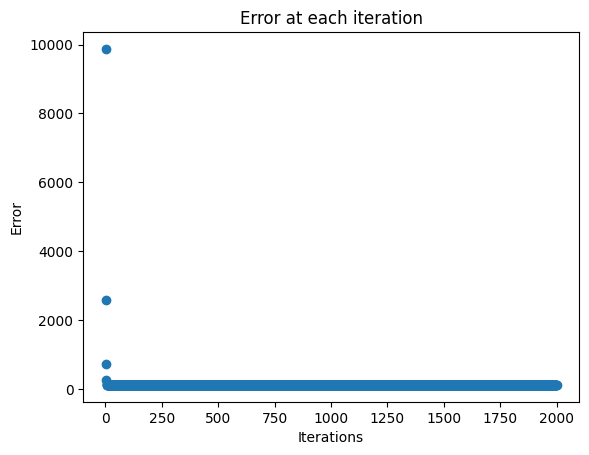

In [6]:
def get_error(m, b, N, midterm_marks, final_marks) -> int:
  error = 0
  for i in range(N):
    x = final_marks[i] - (m * midterm_marks[i] + b)
    error += (x * x)
  return error/N

m = -0.5
b = 0
errorList = []

for i in range(2000):
  errorList.append(get_error(m, b, len(midterm_marks), midterm_marks, final_marks))
  (m_grad, b_grad) = get_gradient(m, b, len(midterm_marks), midterm_marks, final_marks)
  m = m - (alpha*(m_grad))
  b = b - (alpha*(b_grad))

x_values = list(range(1,2001))
y_values = errorList

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error at each iteration')
plt.scatter(x_values, y_values, label='Regression line after 100 iterations')

# With Standardized Values


Declaring mean, variance and Number of samples variables

In [7]:
mean = 0
delta = 0
N = len(midterm_marks)

Computing the mean

In [8]:
mean = int(math.fsum(midterm_marks))
mean /= N

Computing the deviation

In [9]:
for mark in midterm_marks:
    delta += pow(mark - mean, 2)
delta = math.sqrt(delta / N)

Computing standardized values

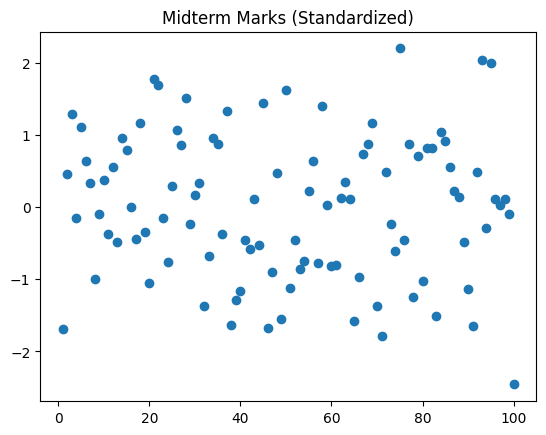

In [10]:
st_midterm_marks = []

for i in range(len(midterm_marks)):
    st_midterm_marks.append((midterm_marks[i] - mean)/delta)

plt.scatter(list(range(1, 101)), st_midterm_marks, label='Regression line after 100 iterations')
plt.title('Midterm Marks (Standardized)')
plt.show()

Re-initalizing m, b and $ \alpha $ values

In [11]:
m = -0.5
b = 0
alpha = 0.0001

Plotting the data points based on the standardized values, and the regression line

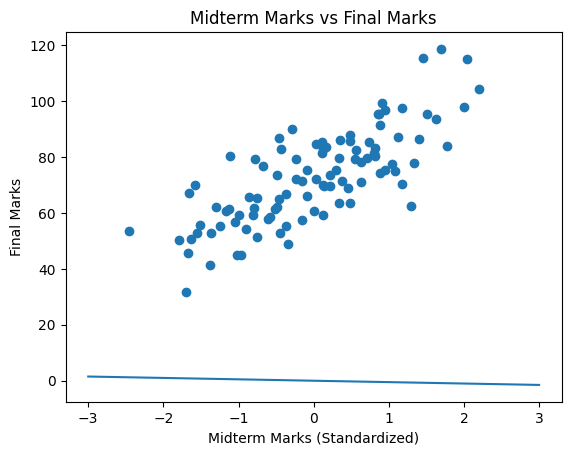

[-1.696288286693593, 0.4588743389535854, 1.2941287536780903, -0.14952085201858445, 1.1188284444149224, 0.6341746482167534, 0.3351329441795852, -0.9950870496409228, -0.08765015463158397, 0.37638007577091864, -0.3660682928730858, 0.5619921679319193, -0.48980968764708605, 0.9538399180495887, 0.7991631745820877, 0.0051558914489164024, -0.4382507731579191, 1.1703873589040892, -0.34544472707741875, -1.0466459641300898, 1.77878254987626, 1.696288286693593, -0.14952085201858445, -0.7579160429907543, 0.293885812588251, 1.077581312823589, 0.8610338719690875, 1.5106761945325917, -0.2320151152012513, 0.1701444178142508, 0.3351329441795852, -1.3766230168607578, -0.6754217798080875, 0.9538399180495887, 0.8816574377647546, -0.3660682928730858, 1.3353758852694237, -1.6344175893065926, -1.294128753678091, -1.1600755760062564, -0.4485625560557526, -0.5826157337275871, 0.11858550332508384, -0.5207450363405867, 1.448805497145591, -1.675664720897926, -0.9022810035604217, 0.4794979047492525, -1.551923326123

In [12]:
x_values = np.linspace(-3, 3, 1000)
def draw_st_plot():
  plt.scatter(st_midterm_marks, final_marks)
  plt.xlabel('Midterm Marks (Standardized)')
  plt.ylabel('Final Marks')
  plt.title('Midterm Marks vs Final Marks')
  plt.plot(x_values, (-0.5 * x_values + 0), label='Regression line after 100 iterations')
  plt.show()
# plt.scatter(x_values, (-0.5 * x_values + 0))
draw_st_plot()
print(st_midterm_marks, final_marks)

Updating m and b, 100 times

-0.23489267544991682 1.4403988666521852


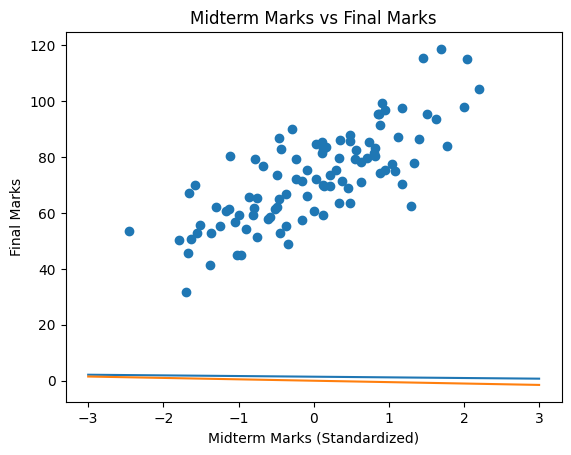

In [13]:
for i in range(100): # 100 Iterations
  (m_grad, b_grad) = get_gradient(m, b, len(st_midterm_marks), st_midterm_marks, final_marks)
  m = m - (alpha*(m_grad)) # Updating m value with each iteration
  b = b - (alpha*(b_grad)) # Updating b value with each iteration

print(m, b)

x_values = np.linspace(-3, 3, 101)
y_values = m * x_values + b
plt.plot(x_values, y_values, label='Regression line after 100 iterations')
draw_st_plot()